In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from warnings import filterwarnings
filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv


**Import Data**

In [2]:
lifestyle = pd.read_csv("/kaggle/input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv")
df = lifestyle.copy()
df.head()


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


**See some calculation about data**

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,44.0,22.500000,12.845233,1.00,11.75,22.5,33.250,44.0
Life expectancy(years) (Country),44.0,78.175000,5.304370,56.30,75.40,80.4,81.800,83.2
Happiness levels(Country),44.0,6.435000,0.991202,3.57,5.87,6.9,7.175,7.8
Outdoor activities(City),44.0,213.977273,127.190297,23.00,125.25,189.5,288.250,585.0
Number of take out places(City),44.0,1443.113636,1388.803270,250.00,548.00,998.0,1674.250,6417.0


In [4]:
import matplotlib.pyplot as plt


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [6]:
df.shape

(44, 12)

In [7]:
df.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

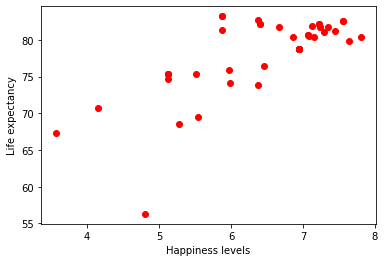

In [8]:
plt.scatter(df["Happiness levels(Country)"],df['Life expectancy(years) (Country)'],c="r");
plt.xlabel("Happiness levels");
plt.ylabel("Life expectancy");


**LinearRegression Model just 1 independent variable**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [10]:
x = df["Happiness levels(Country)"].values.reshape(-1,1)
y = df["Life expectancy(years) (Country)"].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.40,random_state=1)


**Make a model with train set**

In [11]:
lin_reg = LinearRegression().fit(x_train,y_train)

In [12]:
lin_reg.coef_[0][0]

3.685781609106456

In [13]:
lin_reg.intercept_[0]

54.94831575444759

In [14]:
print("{0}+{1}*Happiness Level".format(lin_reg.intercept_[0],lin_reg.coef_[0][0]))

54.94831575444759+3.685781609106456*Happiness Level


**Prediction about model**

In [15]:
y_pred = lin_reg.predict(x_test)
y_pred[0:10]

array([[82.03881058],
       [81.81766368],
       [75.25697242],
       [73.85637541],
       [70.24430943],
       [80.52764012],
       [82.81282472],
       [78.4267446 ],
       [79.49562127],
       [80.52764012]])

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.734364962273343

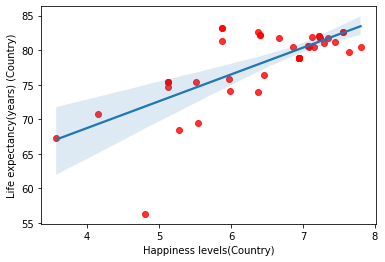

In [17]:
g = sns.regplot(df["Happiness levels(Country)"],df["Life expectancy(years) (Country)"],scatter_kws={"color":"r"});


***Multiple LinearRegression Model***

In [18]:
mdf =df.copy()
mdf.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [19]:
mdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,44.0,22.500000,12.845233,1.00,11.75,22.5,33.250,44.0
Life expectancy(years) (Country),44.0,78.175000,5.304370,56.30,75.40,80.4,81.800,83.2
Happiness levels(Country),44.0,6.435000,0.991202,3.57,5.87,6.9,7.175,7.8
Outdoor activities(City),44.0,213.977273,127.190297,23.00,125.25,189.5,288.250,585.0
Number of take out places(City),44.0,1443.113636,1388.803270,250.00,548.00,998.0,1674.250,6417.0


In [20]:
mdf.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

**Drop some axis from data**

In [21]:
X = mdf.drop(['City',
              'Rank',
              'Sunshine hours(City)',
              'Cost of a bottle of water(City)',
              'Obesity levels(Country)',
              'Life expectancy(years) (Country)',
              'Pollution(Index score) (City)',
              'Annual avg. hours worked',
             'Cost of a monthly gym membership(City)'],axis=1)
X.head()


,Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
0,7.44,422,1048
1,7.22,406,1103
2,7.29,132,1008
3,7.35,129,598
4,7.64,154,523


In [22]:
Y = mdf['Life expectancy(years) (Country)'].values.reshape(-1,1)



In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.4,random_state =1)

In [24]:
linear_model = LinearRegression().fit(x_train,y_train)

In [25]:
linear_model.coef_[0]

array([ 3.67513559e+00, -2.92132778e-04,  4.05959866e-04])

In [26]:
linear_model.intercept_[0]

54.333481026883724

In [27]:
y_pred = linear_model.predict(x_test)
y_pred[0:5]

array([[81.55080646],
       [81.49586547],
       [75.01284888],
       [73.44368947],
       [69.59242479]])

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.678406873584574